# <span style='color:#FE774C'>EMODnet Human Activity </span> Example Notebook

#### We recommend duplicating this notebook if you want to make changes to the code or run additional analyses
To do that simply right click on the file on the left panel and select "duplicate"

### The first part of this notebook will show how to pull data, and run visualizations using functions
### The second part uses a gui based approach

In [3]:
import odp.geospatial as odp
import warnings
import cmocean

warnings.filterwarnings("ignore")

In [5]:
db = odp.Database()
db_plt = odp.PlotTools()
gd = odp.GridData()

### Part 1: Using Functions

#### The following shows the available datasets that can be used as dataframes. To see gridded datasets, run *gd.datasets_table* instead. 
#### Alternatively check out the data catalog in the [Ocean Data Explorer Catalog](https://app.oceandata.earth/catalog)

In [6]:
db.datasets

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
World Ocean Database Casts,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of the casts of the World Ocean Databa...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...",temperature ...
World Ocean Database Measurements,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of measurements taken from all the cas...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...",temperature ...
Marine Regions - IHO Sea Areas,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,None,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region]",None
Marine Regions - Intersect EEZ IHO Sea,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The intersect of the Exclusive Economic Zones ...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region, eez]",None
Marine Regions - World EEZ,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,Maritime Boundaries and Exclusive Economic Zon...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world, region, eez]",None
Marine Regions - World Marine Heritage Sites,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,World Marine Heritage Sites version 1,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world marine heritage sites, reg...",None
Marine Regions - EEZ Land Union,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The union of world country boundaries and EEZ's,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, region, eez]",None
Ocean Biodiversity Information System,[OBIS],Most comprehensive gateway to the world’s ocea...,None,https://obis.org/,OBIS (YEAR) Ocean Biodiversity Information Sys...,global ocean biodiversity,"[biodiversity, species, taxa, ocean]",None
World Register of Marine Species,[WoRMS],Authoritative and comprehensive list of names ...,None,https://www.marinespecies.org/index.php,WoRMS Editorial Board (2022). World Register o...,authoritative list of marine species,"[marine species, biodiversity, register]",None


#### <span style='color:#3464eb'>To search for datasets with specific tags you can run:<span>

In [12]:
df_db = db.datasets
df_db[["shellfish" in x for x in df_db["tags"]]]

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
Emodnet HA aquaculture - shellfish,[EMODnet],The database on shellfish aquaculture in the E...,The database on shellfish aquaculture in the E...,https://www.emodnet-humanactivities.eu/search-...,"EMODnet Human Activities, Aquaculture, Shellfish",aquaculture,"[aquaculture, shellfish, emodnet, human activi...",None


#### <span style='color:#3464eb'>You can also access citation information, databsase description etc.

In [13]:
db.datasets.loc["Emodnet HA aquaculture - shellfish"].database_description

'The database on shellfish aquaculture in the EU was created in 2014 by AND-International for the European Marine Observation and Data Network (EMODnet). It is the result of the aggregation and harmonization of datasets provided by national sources across the EU (plus Norway and the UK) and by the project Euroshell. Data are available for viewing and download on EMODnet - Human Activities web portal (www.emodnet-humanactivities.eu). The database contains points representing shellfish farms or shellfish production areas (depending on available data) in the following countries: Bulgaria, Denmark, France, Greece, Ireland, Italy, Netherlands, Norway, Slovenia, Spain and United Kingdom. Data from Bulgaria, Denmark, Greece, Ireland, Norway, Spain and Scotland come from the official lists of registered aquaculture sites. Data from France relies on cadastral data. Data from the Netherlands, Italy and England and Wales come from the Euroshell project. Data is missing for Germany, Portugal, Swed

## Pulling data - <span style='color:#FE774C'> Emodnet HA aquaculture - shellfish </span> 


#### Insert the name of the table you are interested in into the query function
This returns a [geopandas](https://geopandas.org/en/stable/docs.html) dataframe with a geometry column<br>
There are many built-in functions you can use with these geopandas dataframes

In [16]:
df = db.query("Emodnet HA aquaculture - shellfish", limit=100)

In [17]:
df.head()

,SITE_ID,COUNTRY,OWNER_NAME,AREA_NAME,STATUS,FARM_TYPE,PRODUCTION,PRODUCTI_1,PURPOSE,SPECIES_DE,POINT_INFO,POINT_DEFI,COAST_DIST,POSITION_C,geometry
0,FR_0044,France,n.a.,Oulme,n.a.,Oysters,n.a.,n.a.,n.a.,Oysters,Polygon centroid,Production area,98.345576,Within the coastline,POINT (-1.19900 45.86622)
1,FR_0105,France,n.a.,Etier neuf,n.a.,Oysters,n.a.,n.a.,n.a.,Oysters,Polygon centroid,Production area,37.634861,Within the coastline,POINT (-1.21492 45.90642)
2,FR_0155,France,n.a.,Grand Village,n.a.,Oysters,n.a.,n.a.,n.a.,Oysters,Polygon centroid,Production area,624.909025,Within the coastline,POINT (-1.21033 45.86258)
3,FR_0001,France,n.a.,Nord Oléron,n.a.,Oysters,n.a.,n.a.,n.a.,Oysters,Polygon centroid,Production area,207.829166,Within the coastline,POINT (-1.23657 45.94623)
4,FR_0082,France,n.a.,La Beaudissière,n.a.,Oysters,n.a.,n.a.,n.a.,Oysters,Polygon centroid,Production area,76.563738,Within the coastline,POINT (-1.23116 45.92373)


### <span style='color:#9D59F4'> Plot the data </span> using built-in functions
#### Here we create a static plot of the casts we pulled

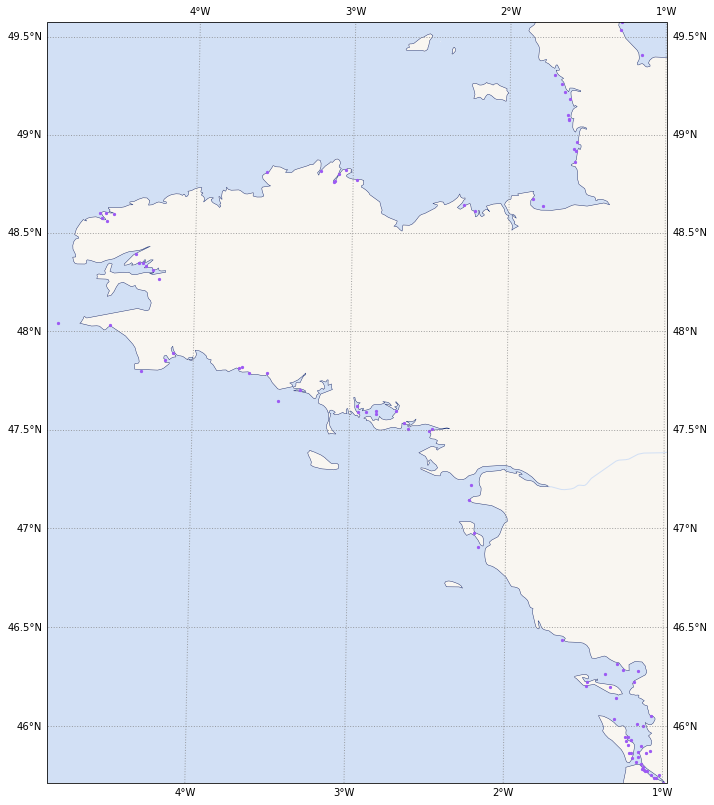

In [18]:
# plotting only the points
db_plt.plot_points(df)

### Add <span style='color:#9D59F4'> filters </span> to the data pull

You can filter for a specific value in a column, or a specific geographical area

#### For example, if we are only interested in farms from a specific country and for a specific species:
First let's make the filter using the filter_data functions<br>
Input the column, the operator, and the value you want to filter on

In [20]:
filter1 = db.filter_data("COUNTRY", "=", "France")
filter2 = db.filter_data("FARM_TYPE", "=", "Mussels")

In [21]:
df = db.query("Emodnet HA aquaculture - shellfish", filters=[filter1, filter2])

In [22]:
df.head()

,SITE_ID,COUNTRY,OWNER_NAME,AREA_NAME,STATUS,FARM_TYPE,PRODUCTION,PRODUCTI_1,PURPOSE,SPECIES_DE,POINT_INFO,POINT_DEFI,COAST_DIST,POSITION_C,geometry
0,FR_0176,France,n.a.,Riviere de l'Elorn aval,n.a.,Mussels,n.a.,n.a.,n.a.,Mussels,Polygon centroid,Production area,107.797078,At sea,POINT (-4.38003 48.39307)
1,FR_0046,France,n.a.,Hauteville sur Mer,n.a.,Mussels,n.a.,n.a.,n.a.,Mussels,Polygon centroid,Production area,734.606130,At sea,POINT (-1.57155 48.96334)
2,FR_0145,France,n.a.,Donville les Bains,n.a.,Mussels,n.a.,n.a.,n.a.,Mussels,Polygon centroid,Production area,246.657813,At sea,POINT (-1.58249 48.86186)
3,FR_0149,France,n.a.,Baie de la Fresnaie - Partie Est,n.a.,Mussels,n.a.,n.a.,n.a.,Mussels,Polygon centroid,Production area,1076.183300,At sea,POINT (-2.28986 48.64192)
4,FR_0077,France,n.a.,Bricqueville Sud,n.a.,Mussels,n.a.,n.a.,n.a.,Mussels,Polygon centroid,Production area,520.011630,At sea,POINT (-1.57328 48.91699)


#### We can also create an interactive plot (will show only when cell is run)

In [23]:
db_plt.plot(df)

{"initialViewState": {"latitude": 0, "longitude": 0, "zoom": 1}, "layers": [{"@@type": "PointCloudLayer", "autoHighlight": true, "data": [{"AREA_NAME": "Riviere de l'Elorn aval", "COAST_DIST": 107.797078168, "COUNTRY": "France", "FARM_TYPE": "Mussels", "OWNER_NAME": "n.a.", "POINT_DEFI": "Production area", "POINT_INFO": "Polygon centroid", "POSITION_C": "At sea", "PRODUCTION": "n.a.", "PRODUCTI_1": "n.a.", "PURPOSE": "n.a.", "SITE_ID": "FR_0176", "SPECIES_DE": "Mussels", "STATUS": "n.a.", "geometry": {"coordinates": [-4.38003129599997, 48.393068364000044], "type": "Point"}}, {"AREA_NAME": "Hauteville sur Mer", "COAST_DIST": 734.606130317, "COUNTRY": "France", "FARM_TYPE": "Mussels", "OWNER_NAME": "n.a.", "POINT_DEFI": "Production area", "POINT_INFO": "Polygon centroid", "POSITION_C": "At sea", "PRODUCTION": "n.a.", "PRODUCTI_1": "n.a.", "PURPOSE": "n.a.", "SITE_ID": "FR_0046", "SPECIES_DE": "Mussels", "STATUS": "n.a.", "geometry": {"coordinates": [-1.5715492649999305, 48.96334019500006], "type": "Point"}}, {"AREA_NAME": "Donville les Bains", "COAST_DIST": 246.657812623, "COUNTRY": "France", "FARM_TYPE": "Mussels", "OWNER_NAME": "n.a.", "POINT_DEFI": "Production area", "POINT_INFO": "Polygon centroid", "POSITION_C": "At sea", "PRODUCTION": "n.a.", "PRODUCTI_1": "n.a.", "PURPOSE": "n.a.", "SITE_ID": "FR_0145", "SPECIES_DE": "Mussels", "STATUS": "n.a.", "geometry": {"coordinates": [-1.5824943929999336, 48.86186272500004], "type": "Point"}}, {"AREA_NAME": "Baie de la Fresnaie - Partie Est", "COAST_DIST": 1076.18329952, "COUNTRY": "France", "FARM_TYPE": "Mussels", "OWNER_NAME": "n.a.", "POINT_DEFI": "Production area", "POINT_INFO": "Polygon centroid", "POSITION_C": "At sea", "PRODUCTION": "n.a.", "PRODUCTI_1": "n.a.", "PURPOSE": "n.a.", "SITE_ID": "FR_0149", "SPECIES_DE": "Mussels", "STATUS": "n.a.", "geometry": {"coordinates": [-2.289864171999966, 48.64191566000005], "type": "Point"}}, {"AREA_NAME": "Bricqueville Sud", "COAST_DIST": 520.011629745, "COUNTRY": "France", "FARM_TYPE": "Mussels", "OWNER_NAME": "n.a.", "POINT_DEFI": "Production area", "POINT_INFO": "Polygon centroid", "POSITION_C": "At sea", "PRODUCTION": "n.a.", "PRODUCTI_1": "n.a.", "PURPOSE": "n.a.", "SITE_ID": "FR_0077", "SPECIES_DE": "Mussels", "STATUS": "n.a.", "geometry": {"coordinates": [-1.5732750239999405, 48.91698798500005], "type": "Point"}}, {"AREA_NAME": "Riviere de l'Odet aval", "COAST_DIST": 69.6705248182, "COUNTRY": "France", "FARM_TYPE": "Mussels", "OWNER_NAME": "n.a.", "POINT_DEFI": "Production area", "POINT_INFO": "Polygon centroid", "POSITION_C": "At sea", "PRODUCTION": "n.a.", "PRODUCTI_1": "n.a.", "PURPOSE": "n.a.", "SITE_ID": "FR_0055", "SPECIES_DE": "Mussels", "STATUS": "n.a.", "geometry": {"coordinates": [-4.129079775999969, 47.88974542600005], "type": "Point"}}, {"AREA_NAME": "Zone conchylicole Hirel", "COAST_DIST": 2896.46131842, "COUNTRY": "France", "FARM_TYPE": "Mussels", "OWNER_NAME": "n.a.", "POINT_DEFI": "Production area", "POINT_INFO": "Polygon centroid", "POSITION_C": "At sea", "PRODUCTION": "n.a.", "PRODUCTI_1": "n.a.", "PURPOSE": "n.a.", "SITE_ID": "FR_0214", "SPECIES_DE": "Mussels", "STATUS": "n.a.", "geometry": {"coordinates": [-1.7857672789999697, 48.636467226000036], "type": "Point"}}, {"AREA_NAME": "Embouchure - Banc du Nord", "COAST_DIST": 3542.80279103, "COUNTRY": "France", "FARM_TYPE": "Mussels", "OWNER_NAME": "n.a.", "POINT_DEFI": "Production area", "POINT_INFO": "Polygon centroid", "POSITION_C": "At sea", "PRODUCTION": "n.a.", "PRODUCTI_1": "n.a.", "PURPOSE": "n.a.", "SITE_ID": "FR_0203", "SPECIES_DE": "Mussels", "STATUS": "n.a.", "geometry": {"coordinates": [-2.2235492629999385, 47.21887650700006], "type": "Point"}}, {"AREA_NAME": "Pirou Nord", "COAST_DIST": 1093.64677863, "COUNTRY": "France", "FARM_TYPE": "Mussels", "OWNER_NAME": "n.a.", "POINT_DEFI": "Production area", "POINT_INFO": "Polygon centroid", "POSITION_C": "At sea", "PRODUCTION": "n.a.", "PRODUCTI_1": "n.a.", "PURPOSE": "n.a.", "SITE_ID": "FR_0162", "SPECIES_DE

## Part 2: Using interactive GUI

#### You can pick to pull EMODnet human activity datasets dropdown. These datasets don't take time inputs

In [24]:
db.selector()

GridspecLayout(children=(Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zo…

In [25]:
df = db.data
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID_Site     169 non-null    object  
 1   Owner_name  169 non-null    object  
 2   Country     169 non-null    object  
 3   Lat         169 non-null    float64 
 4   Long        169 non-null    float64 
 5   Pos_info    169 non-null    object  
 6   geometry    169 non-null    geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 9.4+ KB


In [26]:
df.head()

,ID_Site,Owner_name,Country,Lat,Long,Pos_info,geometry
0,CZ01,EcoFuel Labs,Czech Republic,50.104569,14.489265,Confirmed,POINT (14.48927 50.10457)
1,CZ02,Algamo,Czech Republic,50.486595,15.693215,Estimated,POINT (15.69322 50.48660)
2,DE06,Cyano Biotech GmbH,Germany,52.426966,13.536295,Confirmed,POINT (13.53630 52.42697)
3,DE13,INALGO Dresden I GmbH,Germany,51.477613,14.341869,Confirmed,POINT (14.34187 51.47761)
4,DE17,Euspiron,Germany,51.437983,12.682411,Estimated,POINT (12.68241 51.43798)
